In [ ]:
from skimage import feature
from imutils import paths
import numpy as np
import argparse
import cv2 as cv
import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Function

In [ ]:
def preprocess(image, image_size=128):
		image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
		image = cv.resize(image, (image_size, image_size))
		image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1] 
		return image

In [ ]:
def quantify_image_hog(image) : 
  features = feature.hog(image, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
  return features

In [ ]:
def quantify_image_lbp(image) : 
  features = feature.local_binary_pattern(image, 24, 8, method='uniform')

  (hist, _) = np.histogram(features.flatten(), bins=np.arange(0, 27), range=(0, 26))
  hist = hist.astype("float")
  hist /= (hist.sum()+ 1e-7)

  return hist

In [ ]:
def load_split(path, image_size = 128, extraction_method = 'hog') : 
  image_paths = list(paths.list_images(path))
  data = []
  labels = []

  for image_path in image_paths :
    label = image_path.split(os.path.sep)[-2]

    image = cv.imread(image_path)
    image = preprocess(image, image_size = image_size)

    if extraction_method == 'hog':
      features = quantify_image_hog(image)
    elif extraction_method == 'lbp' :
      features = quantify_image_lbp(image)

    data.append(features)
    labels.append(label)

  return (np.array(data), np.array(labels))

In [ ]:
def model_algo(nama_model, model) : 
  for index,nm_mdl in enumerate(nama_model) :  
    mdl = model[index]
    mdl.fit(feature_train, label_train)
    predictions = mdl.predict(feature_test)

    print("Hasil Menggunakan Model :",nm_mdl)
    print("Akurasi dengan "+nm_mdl+"         -> {:.5f}".format(mdl.score(feature_test, label_test)))
    print("F1 Score dengan "+nm_mdl+"        -> {:.5f}".format(f1_score(label_test, predictions, average="macro")))
    print("Precision Score dengan "+nm_mdl+" -> {:.5f}".format(precision_score(label_test, predictions, average="macro")))
    print("Recall Score dengan "+nm_mdl+"    -> {:.5f}".format(recall_score(label_test, predictions, average="macro")))
    print("\n")
    print(classification_report(label_test, predictions))
    print("\n")
    print("----------------------"*5)
    print("\n")

In [ ]:
def hasil_image(contour_num, x, y, w, h, hasil_num):
  x, y, w, h = cv.boundingRect(contours[contour_num])
  hasil_num = image_gray[y:y+h, x:x+w]
  cv2_imshow(hasil_num)

In [ ]:
# def apply_model(objects, image_ori, model):
#   for obj in objects:
#     image_ori = obj['image']
#     image = preprocess(image, image_size=resize_image_size)

#     if extraction_method == 'pxb':
#       features = quantify_image_pxb(image)
#     elif extraction_method == 'hog':
#       features = quantify_image_hog(image)
#     elif extraction_method == 'lbp':
#       features = quantify_image_lbp(image)

#     preds = model.predict([features])
#     label = le.inverse_transform(preds)[0]

#     text = str(label)
#     color = (0,255,0)
#     text_org = (obj['left']-5,obj['top']-8)

#     cv.rectangle(image_ori,(obj['left']-5,obj['top']-5),(obj['right']+5,obj['bottom']+5),color,2)
#     cv.putText(image_ori,text,text_org,cv.FONT_HERSHEY_SIMPLEX,0.5,color,2)
  
#   cv2_imshow(image_ori)

#Test Code

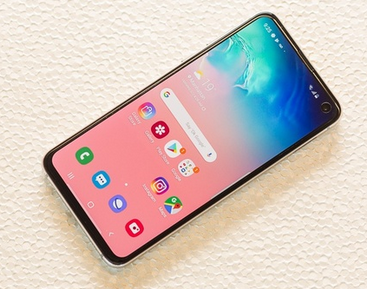

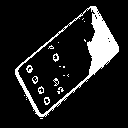

HOG Test
[0. 0. 0. ... 0. 0. 0.] 4356
LBP Test
[9.88769531e-03 7.62939453e-03 1.64794922e-03 6.10351562e-04
 6.10351562e-04 4.27246094e-04 6.10351562e-05 0.00000000e+00
 3.05175781e-04 1.09863281e-03 1.15966797e-03 2.38037109e-03
 2.92968750e-03 4.57763672e-03 3.66210937e-03 4.69970703e-03
 2.80761719e-03 3.54003906e-03 2.74658203e-03 2.80761719e-03
 1.28173828e-03 1.83105469e-03 4.88281250e-04 3.17382812e-03
 8.89038086e-01 5.05981445e-02] 26


In [ ]:
image_test = cv.imread('drive/My Drive/Colab_Test/Dataset/Computer Vision/phones/phones.png')

test_preprocessed = preprocess(image_test, image_size = 128)

cv2_imshow(image_test)
cv2_imshow(test_preprocessed)

features_hog = quantify_image_hog(test_preprocessed)
features_lbp = quantify_image_lbp(test_preprocessed)

print("HOG Test")
print(features_hog, len(features_hog))
print("LBP Test")
print(features_lbp, len(features_lbp))

function telah berjalan dengan baik

#Set Dataset

In [ ]:
dataset_dir = '/content/drive/My Drive/Colab_Test/Dataset/Computer Vision/numbers_dataset'

trainingPath = os.path.join(dataset_dir, "training")
testingPath = os.path.join(dataset_dir, "testing")

#Machine Learning

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Method = HOG dan Size = 28


In [ ]:
resize_image_size = 28
extraction_method = 'hog'

In [ ]:
(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

In [ ]:
nama_model = ["LinearSVC", "Logistic Regression", "Random Forest Classifier"]
model = [LinearSVC(), LogisticRegression(), RandomForestClassifier()]

model_algo(nama_model, model)

Hasil Menggunakan Model : LinearSVC
Akurasi dengan LinearSVC         -> 0.97444
F1 Score dengan LinearSVC        -> 0.97445
Precision Score dengan LinearSVC -> 0.97446
Recall Score dengan LinearSVC    -> 0.97444


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       300
           1       0.98      0.98      0.98       300
           2       0.98      0.97      0.98       300

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



--------------------------------------------------------------------------------------------------------------


Hasil Menggunakan Model : Logistic Regression
Akurasi dengan Logistic Regression         -> 0.96667
F1 Score dengan Logistic Regression        -> 0.96662
Precision Score dengan Logistic Regression -> 0.96680
Recall Score dengan Logistic Regression    -> 0.96667


              precision   

#Method = LBP dan Size = 28


In [ ]:
resize_image_size = 28
extraction_method = 'lbp'

In [ ]:
(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

In [ ]:
nama_model = ["LinearSVC", "Logistic Regression", "Random Forest Classifier"]
model = [LinearSVC(), LogisticRegression(), RandomForestClassifier()]

model_algo(nama_model, model)

Hasil Menggunakan Model : LinearSVC
Akurasi dengan LinearSVC         -> 0.79333
F1 Score dengan LinearSVC        -> 0.78633
Precision Score dengan LinearSVC -> 0.80995
Recall Score dengan LinearSVC    -> 0.79333


              precision    recall  f1-score   support

           0       0.81      0.52      0.64       300
           1       0.97      1.00      0.99       300
           2       0.65      0.86      0.74       300

    accuracy                           0.79       900
   macro avg       0.81      0.79      0.79       900
weighted avg       0.81      0.79      0.79       900



--------------------------------------------------------------------------------------------------------------


Hasil Menggunakan Model : Logistic Regression
Akurasi dengan Logistic Regression         -> 0.75556
F1 Score dengan Logistic Regression        -> 0.73989
Precision Score dengan Logistic Regression -> 0.78346
Recall Score dengan Logistic Regression    -> 0.75556


              precision   

#Method = HOG dan Size = 128


In [ ]:
resize_image_size = 128
extraction_method = 'hog'

In [ ]:
(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

In [ ]:
nama_model = ["LinearSVC", "Logistic Regression", "Random Forest Classifier"]
model = [LinearSVC(), LogisticRegression(), RandomForestClassifier()]

model_algo(nama_model, model)

Hasil Menggunakan Model : LinearSVC
Akurasi dengan LinearSVC         -> 0.99444
F1 Score dengan LinearSVC        -> 0.99444
Precision Score dengan LinearSVC -> 0.99446
Recall Score dengan LinearSVC    -> 0.99444


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       300
           1       1.00      1.00      1.00       300
           2       1.00      0.99      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



--------------------------------------------------------------------------------------------------------------


Hasil Menggunakan Model : Logistic Regression
Akurasi dengan Logistic Regression         -> 0.99222
F1 Score dengan Logistic Regression        -> 0.99222
Precision Score dengan Logistic Regression -> 0.99228
Recall Score dengan Logistic Regression    -> 0.99222


              precision   

#Best Accuration Image Show

In [ ]:
models = LinearSVC()
models.fit(feature_train, label_train)
predictions = models.predict(feature_test)

In [ ]:
# Pathing image
testing_paths = list(paths.list_images(testingPath))
images = []

for testing_path in testing_paths[300:]:
  image = cv.imread(testing_path)
  output = image.copy()
  output = cv.resize(output, (128, 128))

  image = preprocess(image, image_size=resize_image_size)

  if extraction_method == 'hog':
    features = quantify_image_hog(image)
  elif extraction_method == 'lbp':
    features = quantify_image_lbp(image)
  
  preds = models.predict([features])
  label = le.inverse_transform(preds)[0]

  if label == "0": 
    color = (255, 0, 0)
  elif label == "1":
    color = (0, 255, 0)
  else : 
    color = (0, 0, 255)

  cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
  images.append(output)

In [ ]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (20, 20))[0]
cv2_imshow(montage)

Output hidden; open in https://colab.research.google.com to view.

#Test Akurasi 


In [ ]:
test_image = cv.imread('drive/My Drive/Colab_Test/Dataset/Computer Vision/numbers_dataset/Tambah Data/Sample.png')

In [ ]:
# test_image_ori = test_image.copy()

# Image properties

# image_height = image.shape[0]
# image_width = image.shape[1]
# image_area = image_height*image_width

In [ ]:
image_gray = cv.cvtColor(test_image, cv.COLOR_BGR2GRAY)

120.0


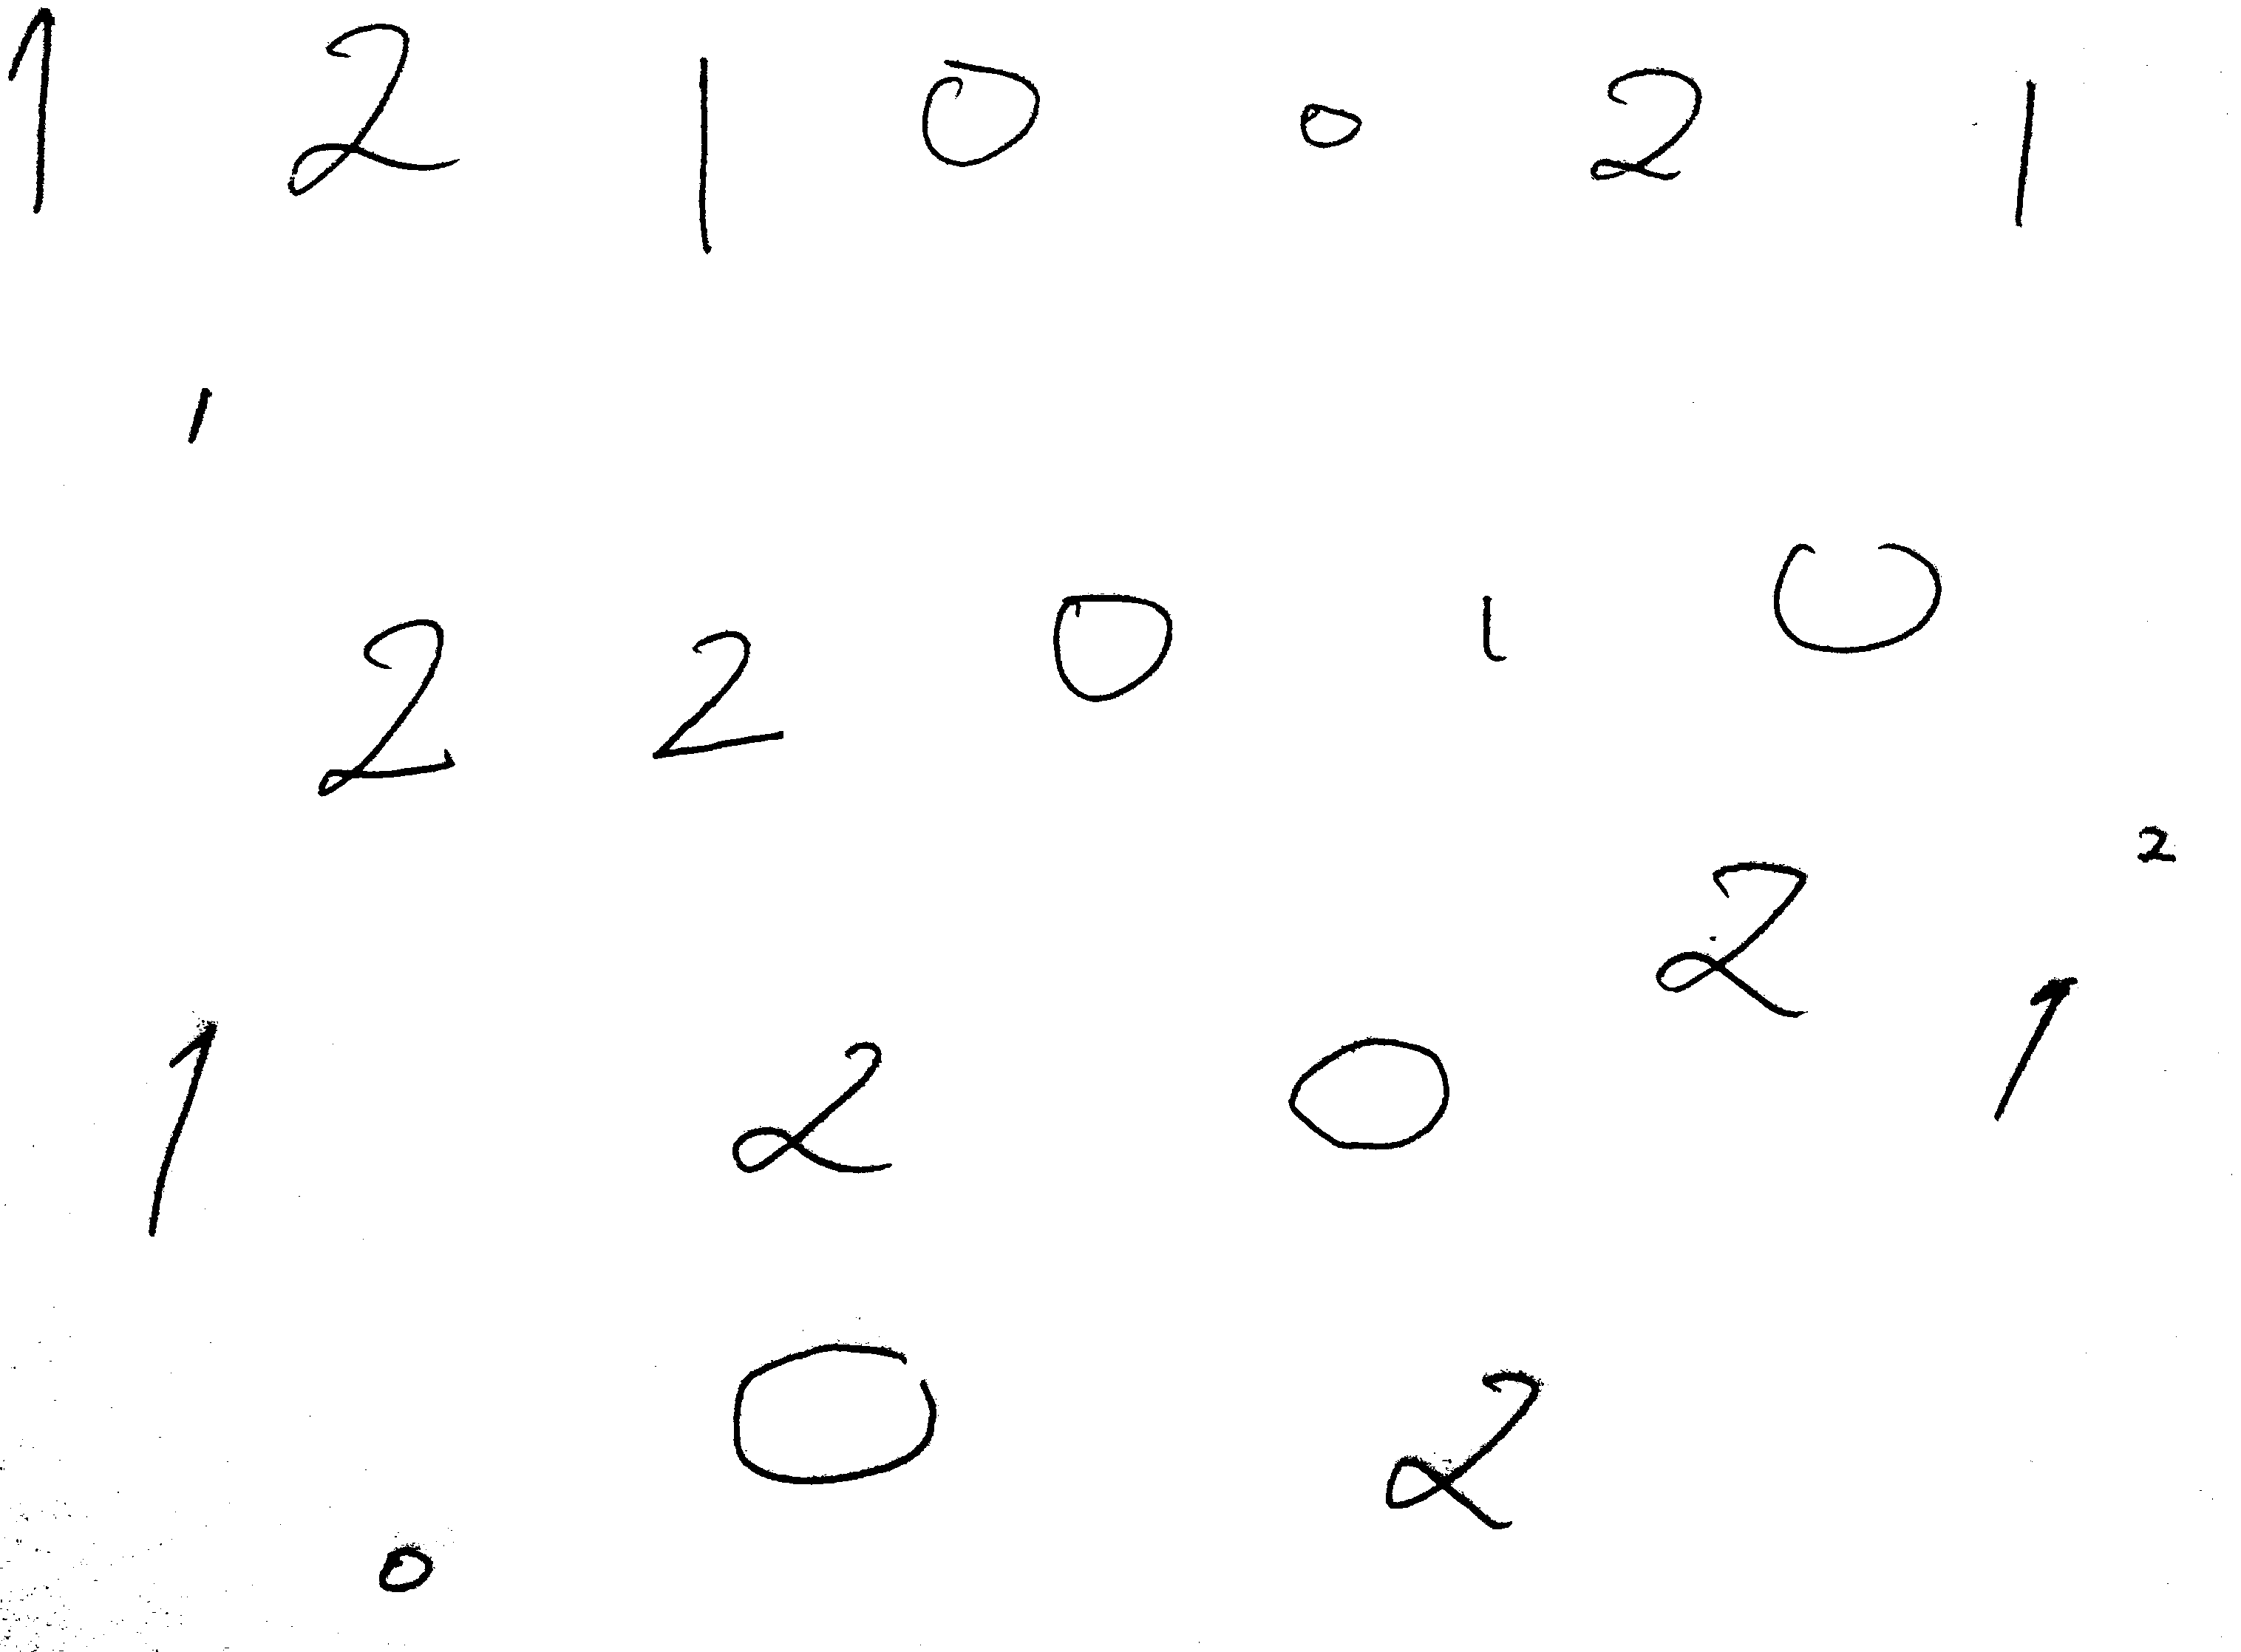

In [ ]:
thresholding_value_1, thresholding_result_1 = cv.threshold(image_gray, 120, 255, cv.THRESH_BINARY)
print(thresholding_value_1)
cv2_imshow(thresholding_result_1)

In [ ]:
thresholding_result_1 = cv.bitwise_not(thresholding_result_1)

contours, hierarchy = cv.findContours(thresholding_result_1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# print(contours)

In [ ]:
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)
  print("Contour #" + str(index), x, y, w, h, area)

Contour #0 80 2233 6 1 0.0
Contour #1 27 2233 1 2 0.0
Contour #2 302 2232 1 1 0.0
Contour #3 206 2232 2 1 0.0
Contour #4 71 2232 2 1 0.0
Contour #5 42 2232 8 3 4.0
Contour #6 211 2231 3 4 4.0
Contour #7 304 2229 6 1 0.0
Contour #8 117 2227 1 1 0.0
Contour #9 22 2226 1 3 0.0
Contour #10 6 2226 2 1 0.0
Contour #11 1245 2225 1 1 0.0
Contour #12 547 2225 1 1 0.0
Contour #13 48 2225 5 5 4.0
Contour #14 38 2224 1 1 0.0
Contour #15 0 2224 1 1 0.0
Contour #16 525 2223 1 2 0.0
Contour #17 197 2223 1 1 0.0
Contour #18 86 2222 1 2 0.0
Contour #19 1622 2221 1 2 0.0
Contour #20 41 2220 2 1 0.0
Contour #21 2 2219 1 1 0.0
Contour #22 5 2217 1 1 0.0
Contour #23 126 2216 2 1 0.0
Contour #24 3005 2214 1 1 0.0
Contour #25 52 2214 1 1 0.0
Contour #26 102 2213 1 2 0.0
Contour #27 6 2213 8 5 10.5
Contour #28 140 2211 1 1 0.0
Contour #29 457 2209 1 1 0.0
Contour #30 190 2209 1 1 0.0
Contour #31 48 2209 3 2 1.0
Contour #32 185 2208 2 1 0.0
Contour #33 11 2205 3 3 3.5
Contour #34 109 2203 1 2 0.0
Contour #35 8

In [ ]:
# # contours = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0] "jangan di run baris ini, soalnya jadi ngebuang kontur yg atas"

# objects = []

# for contour in contours:
#   area = cv.contourArea(contour)
#   if area > 0.01*image_area:
#     x, y, w, h = cv.boundingRect(contour)
#     objects.append({'image'  : test_image[y:y+h, x:x+w],
#                     'left'   : x,
#                     'top'    : y,
#                     'right'  : x+w,
#                     'bottom' : y+h})
    
# apply_model(objects, test_image_ori, LinearSVC())

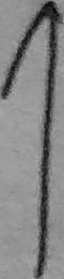

In [ ]:
x1, y1, w1, h1 = cv.boundingRect(contours[296])
hasil_1 = image_gray[y:y1+h1, x:x1+w1]
hasil_image(296, x1, y1, w1, h1,  hasil_1)

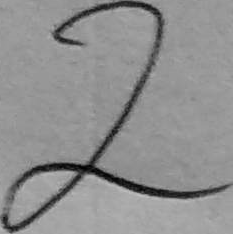

In [ ]:
x2, y2, w2, h2 = cv.boundingRect(contours[295])
hasil_2 = image_gray[y:y2+h2, x:x2+w2]
hasil_image(295, x2, y2, w2, h2,  hasil_2)

In [ ]:
x3, y3, w3, h3 = cv.boundingRect(contours[291])
hasil_3 = image_gray[y:y3+h3, x:x3+w3]
hasil_image(291, x3, y3, w3, h3,  hasil_3)

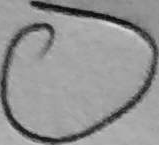

In [ ]:
x4, y4, w4, h4 = cv.boundingRect(contours[290])
hasil_4 = image_gray[y:y+h, x:x+w]
hasil_image(290, x4, y4, w4, h4,  hasil_4)

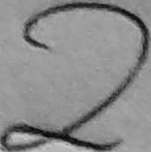

In [ ]:
x5, y5, w5, h5 = cv.boundingRect(contours[287])
hasil_5 = image_gray[y:y5+h5, x:x5+w5]
hasil_image(287, x5, y5, w5, h5,  hasil_5)

In [ ]:
x6, y6, w6, h6 = cv.boundingRect(contours[284])
hasil_6 = image_gray[y:y6+h6, x:x6+w6]
hasil_image(284, x6, y6, w6, h6,  hasil_6)

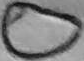

In [ ]:
x7, y7, w7, h7 = cv.boundingRect(contours[281])
hasil_7 = image_gray[y:y7+h7, x:x7+w7]
hasil_image(281, x7, y7, w7, h7,  hasil_7)

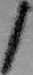

In [ ]:
x8, y8, w8, h8 = cv.boundingRect(contours[276])
hasil_8 = image_gray[y:y8+h8, x:x8+w8]
hasil_image(276, x8, y8, w8, h8,  hasil_8)

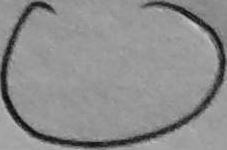

In [ ]:
x9, y9, w9, h9 = cv.boundingRect(contours[273])
hasil_9 = image_gray[y:y9+h9, x:x9+w9]
hasil_image(273, x9, y9, w9, h9,  hasil_9)

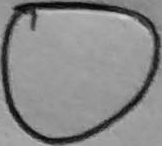

In [ ]:
x10, y10, w10, h10 = cv.boundingRect(contours[266])
hasil_10 = image_gray[y:y10+h10, x:x10+w10]
hasil_image(266, x10, y10, w10, h10,  hasil_10)

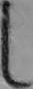

In [ ]:
x11, y11, w11, h11 = cv.boundingRect(contours[265])
hasil_11 = image_gray[y:y+h, x:x+w]
hasil_image(265, x11, y11, w11, h11,  hasil_11)

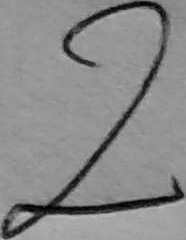

In [ ]:
x12, y12, w12, h12 = cv.boundingRect(contours[263])
hasil_12 = image_gray[y:y+h, x:x+w]
hasil_image(263, x12, y12, w12, h12,  hasil_12)

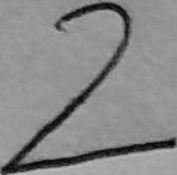

In [ ]:
x13, y13, w13, h13 = cv.boundingRect(contours[260])
hasil_13 = image_gray[y:y+h, x:x+w]
hasil_image(260, x13, y13, w13, h13,  hasil_13)

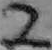

In [ ]:
x14, y14, w14, h14 = cv.boundingRect(contours[259])
hasil_14 = image_gray[y:y+h, x:x+w]
hasil_image(259, x14, y14, w14, h14,  hasil_14)

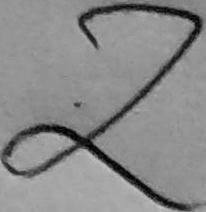

In [ ]:
x15, y15, w15, h15 = cv.boundingRect(contours[257])
hasil_15 = image_gray[y:y+h, x:x+w]
hasil_image(257, x15, y15, w15, h15,  hasil_15)

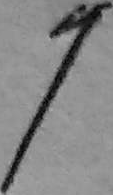

In [ ]:
x16, y16, w16, h16 = cv.boundingRect(contours[250])
hasil_16 = image_gray[y:y+h, x:x+w]
hasil_image(250, x16, y16, w16, h16,  hasil_16)

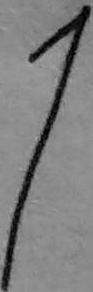

In [ ]:
x17, y17, w17, h17 = cv.boundingRect(contours[243])
hasil_17 = image_gray[y:y+h, x:x+w]
hasil_image(243, x17, y17, w17, h17,  hasil_17)

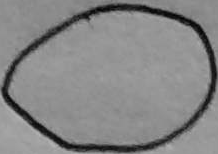

In [ ]:
x18, y18, w18, h18 = cv.boundingRect(contours[236])
hasil_18 = image_gray[y:y+h, x:x+w]
hasil_image(236, x18, y18, w18, h18,  hasil_18)

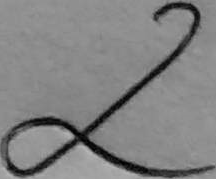

In [ ]:
x19, y19, w19, h19 = cv.boundingRect(contours[234])
hasil_19 = image_gray[y:y+h, x:x+w]
hasil_image(234, x19, y19, w19, h19,  hasil_19)

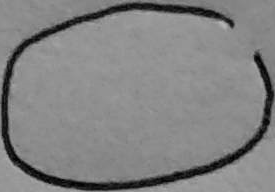

In [ ]:
x20, y20, w20, h20 = cv.boundingRect(contours[197])
hasil_20 = image_gray[y:y20+h20, x:x20+w20]
hasil_image(197, x20, y20, w20, h20,  hasil_20)

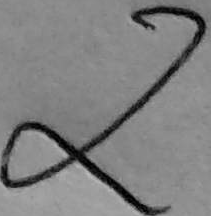

In [ ]:
x21, y21, w21, h21 = cv.boundingRect(contours[183])
hasil_21 = image_gray[y:y+h, x:x+w]
hasil_image(183, x21, y21, w21, h21,  hasil_21)

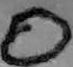

In [ ]:
x22, y22, w22, h22 = cv.boundingRect(contours[115])
hasil_22 = image_gray[y:y+h, x:x+w]
hasil_image(115, x22, y22, w22, h22,  hasil_22)

In [ ]:
cv.rectangle(test_image, (x1,y1),(w1+x1, y1+h1), (255, 0, 0), 1)
cv.rectangle(test_image, (x2,y2),(w2+x2, y2+h2), (255, 0, 0), 1)
cv.rectangle(test_image, (x3,y3),(w3+x3, y3+h3), (255, 0, 0), 1)
cv.rectangle(test_image, (x4,y4),(w4+x4, y4+h4), (255, 0, 0), 1)
cv.rectangle(test_image, (x5,y5),(w5+x5, y5+h5), (255, 0, 0), 1)
cv.rectangle(test_image, (x6,y6),(w6+x6, y6+h6), (255, 0, 0), 1)
cv.rectangle(test_image, (x7,y7),(w7+x7, y7+h7), (255, 0, 0), 1)
cv.rectangle(test_image, (x8,y8),(w8+x8, y8+h8), (255, 0, 0), 1)
cv.rectangle(test_image, (x9,y9),(w9+x9, y9+h9), (255, 0, 0), 1)
cv.rectangle(test_image, (x10,y10),(w10+x10, y10+h10), (255, 0, 0), 1)
cv.rectangle(test_image, (x11,y11),(w11+x11, y11+h11), (255, 0, 0), 1)
cv.rectangle(test_image, (x12,y12),(w12+x12, y12+h12), (255, 0, 0), 1)
cv.rectangle(test_image, (x13,y13),(w13+x13, y13+h13), (255, 0, 0), 1)
cv.rectangle(test_image, (x14,y14),(w14+x14, y14+h14), (255, 0, 0), 1)
cv.rectangle(test_image, (x15,y15),(w15+x15, y15+h15), (255, 0, 0), 1)
cv.rectangle(test_image, (x16,y16),(w16+x16, y16+h16), (255, 0, 0), 1)
cv.rectangle(test_image, (x17,y17),(w17+x17, y17+h17), (255, 0, 0), 1)
cv.rectangle(test_image, (x18,y18),(w18+x18, y18+h18), (255, 0, 0), 1)
cv.rectangle(test_image, (x19,y19),(w19+x19, y19+h19), (255, 0, 0), 1)
cv.rectangle(test_image, (x20,y20),(w20+x20, y20+h20), (255, 0, 0), 1)
cv.rectangle(test_image, (x21,y21),(w21+x21, y21+h21), (255, 0, 0), 1)
cv.rectangle(test_image, (x22,y22),(w22+x22, y22+h22), (255, 0, 0), 1)

cv2_imshow(test_image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# image = preprocess(test_image, image_size=resize_image_size)

# if extraction_method == 'hog':
#   feature_test = quantify_image_hog(image)
# elif extraction_method == 'lbp':
#   feature_test = quantify_image_lbp(image)

# preds = LinearSVC.predict(feature_test)
# label = le.inverse_transform(preds)[0]

# text = str(label)
# color = (0,255,0)
# text_org = (obj['left']-5,obj['top']-8)

# cv.rectangle(test_image,(obj['left']-5,obj['top']-5),(obj['right']+5,obj['bottom']+5),color,2)
# cv.putText(test_image,text,text_org,cv.FONT_HERSHEY_SIMPLEX,0.5,color,2)

# cv2_imshow(test_image)

#Method = LBP dan Size = 128


In [ ]:
resize_image_size = 128
extraction_method = 'lbp'

In [ ]:
(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

In [ ]:
nama_model = ["LinearSVC", "Logistic Regression", "Random Forest Classifier"]
model = [LinearSVC(), LogisticRegression(), RandomForestClassifier()]

model_algo(nama_model, model)

Hasil Menggunakan Model : LinearSVC
Akurasi dengan LinearSVC         -> 0.87111
F1 Score dengan LinearSVC        -> 0.86804
Precision Score dengan LinearSVC -> 0.88916
Recall Score dengan LinearSVC    -> 0.87111


              precision    recall  f1-score   support

           0       0.99      0.69      0.81       300
           1       0.91      1.00      0.95       300
           2       0.77      0.92      0.84       300

    accuracy                           0.87       900
   macro avg       0.89      0.87      0.87       900
weighted avg       0.89      0.87      0.87       900



--------------------------------------------------------------------------------------------------------------


Hasil Menggunakan Model : Logistic Regression
Akurasi dengan Logistic Regression         -> 0.71222
F1 Score dengan Logistic Regression        -> 0.66452
Precision Score dengan Logistic Regression -> 0.80996
Recall Score dengan Logistic Regression    -> 0.71222


              precision   

#Method = HOG dan Size = 300


In [ ]:
resize_image_size = 300
extraction_method = 'hog'

In [ ]:
(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

In [ ]:
nama_model = ["LinearSVC", "Logistic Regression", "Random Forest Classifier"]
model = [LinearSVC(), LogisticRegression(), RandomForestClassifier()]

model_algo(nama_model, model)

Hasil Menggunakan Model : LinearSVC
Akurasi dengan LinearSVC         -> 0.99222
F1 Score dengan LinearSVC        -> 0.99222
Precision Score dengan LinearSVC -> 0.99228
Recall Score dengan LinearSVC    -> 0.99222


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       300
           1       1.00      1.00      1.00       300
           2       1.00      0.98      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



--------------------------------------------------------------------------------------------------------------


Hasil Menggunakan Model : Logistic Regression
Akurasi dengan Logistic Regression         -> 0.99111
F1 Score dengan Logistic Regression        -> 0.99111
Precision Score dengan Logistic Regression -> 0.99120
Recall Score dengan Logistic Regression    -> 0.99111


              precision   

#Method = LBP dan Size = 300


In [ ]:
resize_image_size = 300
extraction_method = 'lbp'

In [ ]:
(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

In [ ]:
nama_model = ["LinearSVC", "Logistic Regression", "Random Forest Classifier"]
model = [LinearSVC(), LogisticRegression(), RandomForestClassifier()]

model_algo(nama_model, model)

Hasil Menggunakan Model : LinearSVC
Akurasi dengan LinearSVC         -> 0.63333
F1 Score dengan LinearSVC        -> 0.52305
Precision Score dengan LinearSVC -> 0.45780
Recall Score dengan LinearSVC    -> 0.63333


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.90      1.00      0.94       300
           2       0.48      0.90      0.62       300

    accuracy                           0.63       900
   macro avg       0.46      0.63      0.52       900
weighted avg       0.46      0.63      0.52       900



--------------------------------------------------------------------------------------------------------------


Hasil Menggunakan Model : Logistic Regression
Akurasi dengan Logistic Regression         -> 0.63889
F1 Score dengan Logistic Regression        -> 0.52872
Precision Score dengan Logistic Regression -> 0.46513
Recall Score dengan Logistic Regression    -> 0.63889


              precision   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetr

Hasil Menggunakan Model : Random Forest Classifier
Akurasi dengan Random Forest Classifier         -> 0.92667
F1 Score dengan Random Forest Classifier        -> 0.92661
Precision Score dengan Random Forest Classifier -> 0.93040
Recall Score dengan Random Forest Classifier    -> 0.92667


              precision    recall  f1-score   support

           0       0.94      0.84      0.89       300
           1       1.00      0.99      0.99       300
           2       0.85      0.95      0.90       300

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



--------------------------------------------------------------------------------------------------------------




#Dari hasil pengujian diatas, saya paling besar mendapatkan akurasi terbesar dengan metode HOG dimana yang paling besar dengan Sizenya 128. 

#Dengan begitu saya melakukan pengujian akurasi terhadap gambar dengan menggunakan HOG dan Size 128 untuk dijadikan acuan, sehingga didapatkan prediksi gambar yang maksimal.